# Aplicando algoritmo basado en Árboles
Inicialmente se toma el archivo csv que se obtuvo de la fase de tratamiento de datos en la primera entrega.

In [13]:
import pandas as pd

encoding = 'iso-8859-1'    
delimiter = ';'
filename = 'bank_balanced.csv'

bank_balanced = pd.read_csv(filename, 
                   delimiter = delimiter,
                   encoding = encoding)
bank_balanced.head()

,age,job,marital,education,default,balance,housing,loan,campaign,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,1.0,0.0,unknown,no


## Aplicando Transformaciones
Debido a que scikit-learn utiliza una versión optimizada del algoritmo CART que no soporta valores categóricos se procede a numerizar los valores categóricos del conjunto de datos.

In [14]:
print('job: ', bank_balanced['job'].unique())
print('marital: ', bank_balanced['marital'].unique())
print('education: ', bank_balanced['education'].unique())
print('default: ', bank_balanced['default'].unique())
print('housing: ', bank_balanced['housing'].unique())
print('loan: ', bank_balanced['loan'].unique())
print('poutcome: ', bank_balanced['poutcome'].unique())
print('y: ', bank_balanced['y'].unique())

job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'other']
marital:  ['married' 'single' 'divorced']
education:  ['tertiary' 'secondary' 'unknown' 'primary']
default:  ['no' 'yes']
housing:  ['yes' 'no']
loan:  ['no' 'yes']
poutcome:  ['unknown' 'failure' 'other' 'success']
y:  ['no' 'yes']


## Numerización
Se generan funciones para realizar las numeraciones.

In [15]:
def bool_to_numeric(x):
    if x=='no': return 0
    if x=='yes': return 1

def job_to_numeric(x):
    if x == 'unknown': return 0
    if x == 'management': return 1
    if x == 'technician': return 2
    if x == 'entrepreneur': return 3
    if x == 'blue-collar': return 4
    if x == 'retired': return 5
    if x == 'admin.': return 6
    if x == 'services': return 7
    if x == 'self-employed': return 8
    if x == 'unemployed': return 9
    if x == 'housemaid': return 10
    if x == 'student': return 11
    if x == 'other': return 12
    
def marital_to_numeric(x):
    if x == 'married': return 0
    if x == 'single': return 1
    if x == 'divorced': return 2

def education_to_numeric(x):
    if x == 'unknown': return 0
    if x == 'primary': return 1
    if x == 'secondary': return 2
    if x == 'tertiary': return 3

def poutcome_to_numeric(x):
    if x == 'unknown': return 0
    if x == 'failure': return 1
    if x == 'success': return 2
    if x == 'other': return 3

bank_balanced['job'] = bank_balanced['job'].apply(job_to_numeric)
bank_balanced['marital'] = bank_balanced['marital'].apply(marital_to_numeric)
bank_balanced['education'] = bank_balanced['education'].apply(education_to_numeric)
bank_balanced['default'] = bank_balanced['default'].apply(bool_to_numeric)
bank_balanced['housing'] = bank_balanced['housing'].apply(bool_to_numeric)
bank_balanced['loan'] = bank_balanced['loan'].apply(bool_to_numeric)
bank_balanced['poutcome'] = bank_balanced['poutcome'].apply(poutcome_to_numeric)
bank_balanced['y'] = bank_balanced['y'].apply(bool_to_numeric)

## Archivo Transformado
A continuación, se muestra el conjunto de datos numerizado:

In [16]:
bank_balanced.head()

,age,job,marital,education,default,balance,housing,loan,campaign,previous,poutcome,y
0,58.0,1,0,3,0,2143.0,1,0,1.0,0.0,0,0
1,44.0,2,1,2,0,29.0,1,0,1.0,0.0,0,0
2,33.0,3,0,2,0,2.0,1,1,1.0,0.0,0,0
3,47.0,4,0,0,0,1506.0,1,0,1.0,0.0,0,0
4,33.0,0,1,0,0,1.0,0,0,1.0,0.0,0,0


## Creando los conjuntos de prueba
Se separan los datos en dos conjuntos. El primero es para los datos utilizados durante el entrenamiento y el restante para realizar las pruebas.

In [17]:
from sklearn.model_selection import train_test_split

bank_data = bank_balanced[['age','job','marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'previous', 'poutcome']]
bank_target = bank_balanced['y']

bank_train, bank_test, y_train, y_test = train_test_split(bank_data, bank_target, random_state=0)

### Verificando tamaños

In [18]:
print("Bank_train shape: {}".format(bank_train.shape))
print("Y_train shape: {}".format(y_train.shape))
print("Bank_test shape: {}".format(bank_test.shape))
print("Y_test shape: {}".format(y_test.shape))

Bank_train shape: (59850, 11)
Y_train shape: (59850,)
Bank_test shape: (19950, 11)
Y_test shape: (19950,)


### Validación Cruzada

In [32]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection  import cross_val_score
from pprint import pprint

x = bank_train
y = y_train

depth = []
for i in range(1,50):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=x, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.6221219715956557), (2, 0.632748538011696), (3, 0.6917627401837929), (4, 0.7022055137844612), (5, 0.7226900584795322), (6, 0.7375438596491228), (7, 0.7421553884711781), (8, 0.744327485380117), (9, 0.7526984126984128), (10, 0.7546532999164578), (11, 0.759515455304929), (12, 0.7646282372598162), (13, 0.769640768588137), (14, 0.7768421052631579), (15, 0.780952380952381), (16, 0.7850793650793652), (17, 0.7910442773600669), (18, 0.7963575605680868), (19, 0.8004678362573099), (20, 0.8035588972431078), (21, 0.8090893901420217), (22, 0.8117293233082706), (23, 0.8176775271512113), (24, 0.8187468671679198), (25, 0.8227568922305765), (26, 0.8221386800334168), (27, 0.8261988304093567), (28, 0.8262322472848789), (29, 0.827451963241437), (30, 0.829406850459482), (31, 0.8292731829573936), (32, 0.8295572263993316), (33, 0.8296741854636592), (34, 0.8295739348370927), (35, 0.8305597326649957), (36, 0.8302422723475357), (37, 0.8298913951545531), (38, 0.8306098579782791), (39, 0.8307268170426064), (

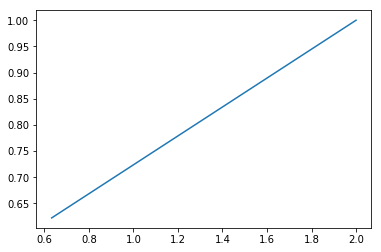

In [43]:
import matplotlib.pyplot as plt
plt.plot(depth[1], depth[0])


## Aplicación del algoritmo
Una vez se tienen los datos en el formato necesario se procede a entrenar el modelo y se genera el vector de predicciones.

In [36]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=36)
clf = clf.fit(bank_train, y_train)
y_predict = clf.predict(bank_test)
y_predict.size

19950

In [21]:
y_test.size

19950

## Métricas
Con los vectores de test y predicción se genera la matriz de confunsión.

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[7947, 1874],
       [1357, 8772]], dtype=int64)

De la matriz de confusión se obtiene lo siguiente:

In [38]:
VN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
VP = cm[1,1]

print('VN: ', VN)
print('FP: ', FP)
print('FN: ', FN)
print('VP: ', VP)

VN:  7947
FP:  1874
FN:  1357
VP:  8772


In [39]:
print('Exactitud: ', (VN + VP) / (VN + VP + FN + FP))
print('Recall: ', VP / (FN + VP))
print('Precisión: ', VP / (FP + VP))
print('F1-Score: ', 2 * VP / (2 * VP + FN + FP))

Exactitud:  0.8380451127819549
Recall:  0.8660282357587126
Precisión:  0.823971444674056
F1-Score:  0.8444765342960289
